#### In this notebook Gradient Boosting model will be use to predict diameter, absorbance, and PL output.
* Optimization will be run to find the optimized estimator number 
* The skill of the model will be reported as an error in those predictions: 
    * MSE
    * R2
    

In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

import sklearn  
from sklearn import metrics
from sklearn.datasets import make_regression
from sklearn import linear_model, datasets
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from tqdm import tqdm

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

In [3]:
#load the data
df = pd.read_csv('../../../Datasets/augmented_data.csv')
df

,Unnamed: 0,Unnamed: 0.1,Growth Temp (Celsius),Metal_mmol (mmol),Chalcogen_mmol (mmol),CA_mmol (mmol),Amines_mmol (mmol),Phosphines_mmol (mmol),S_I_amount (g),S_II_amount (g),...,x4_liquid parafin,x4_octadecene,x4_phenyl ether,x4_trioctylphosphine oxide,x5_None,x5_phosphinic acid,x5_trioctylphosphine oxide,Diameter_nm,Absorbance max (nm),PL max (nm)
0,0,0,1.105103,-0.437486,-0.243779,-0.525437,-0.416112,-0.165455,-0.123360,-0.302087,...,0,1,0,0,1,0,0,3.41,566.0,575.000000
1,1,1,-0.062540,-0.472027,-0.436361,-0.305510,-0.498129,-0.375671,-0.241193,-0.302087,...,0,1,0,0,1,0,0,2.50,474.0,617.000000
2,2,2,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.451959,-0.527427,-0.302087,...,0,1,0,0,1,0,0,1.99,450.4,497.000000
3,3,3,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.13,471.6,510.000000
4,4,4,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.27,486.0,517.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,229,229,0.482360,-0.465119,-0.500554,-0.386536,-0.498129,-0.370585,-0.439276,5.981667,...,0,1,0,0,0,0,1,1.70,450.0,537.714286
230,230,230,0.482360,-0.465119,-0.500554,-0.386536,-0.498129,-0.370585,-0.439276,5.981667,...,0,1,0,0,0,0,1,2.50,530.0,569.785714
231,231,231,0.482360,-0.465119,-0.500554,-0.386536,-0.498129,-0.370585,-0.439276,5.981667,...,0,1,0,0,0,0,1,3.50,585.0,589.714286
232,232,232,0.482360,-0.465119,-0.500554,-0.386536,-0.498129,-0.370585,-0.439276,5.981667,...,0,1,0,0,0,0,1,3.70,590.0,589.714286


In [4]:
#Separate X and y data
X = df.drop(columns =['Unnamed: 0','Unnamed: 0.1','Diameter_nm','Absorbance max (nm)', 'PL max (nm)'], 
                  inplace = False, axis = 1) #keep synthesis parameters that matter
y_size = df['Diameter_nm'].values #will predict diameter
y_abs = df['Absorbance max (nm)'].values #will predict absorbance
y_PL = df['PL max (nm)'].values #will predict PL

# Size prediction

In [6]:
#split dataset into train and test set
X_train, X_test, y_size_train, y_size_test = train_test_split(X, y_size, test_size=0.25, random_state=8, shuffle=True)

In [8]:
#optimising parameters

R2_dict = {}
    
for estimator in tqdm(np.arange (1, 1000, 1)):
    gbm = GradientBoostingRegressor(n_estimators=estimator)
    gbm.fit(X_train,y_size_train)
    y_size_predict = gbm.predict(X_test)
    MSE = mean_squared_error(y_size_test, y_size_predict)
    R2 = r2_score(y_size_test, y_size_predict)
    R2_dict[estimator] = R2
    
print("best estimator = ", max(R2_dict, key=R2_dict.get))

100%|██████████| 999/999 [03:16<00:00,  5.07it/s]

best estimator =  758


In [7]:
gbm = GradientBoostingRegressor(n_estimators=758)
gbm.fit(X_train,y_size_train)
y_size_predict = gbm.predict(X_test)
MSE = mean_squared_error(y_size_test, y_size_predict)
R2 = r2_score(y_size_test, y_size_predict)

print("MSE", MSE, "R2", R2)

MSE 0.5481011122841157 R2 0.6972470580985992


In [8]:
# Calculation of MAE
print("The MAE for Diameter prediction is ", metrics.mean_absolute_error(y_size_test, y_size_predict))

The MAE for Diameter prediction is  0.3549776394332176


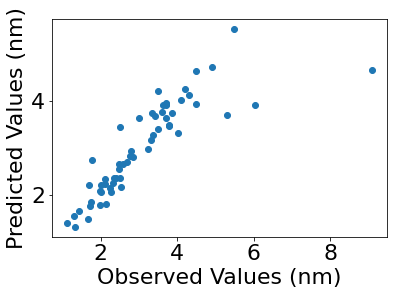

In [9]:
plt.figure()
plt.title("")
plt.plot(y_size_test, y_size_predict, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

# Absorbance prediction

In [11]:
#split dataset into train and test set
X_train, X_test, y_abs_train, y_abs_test = train_test_split(X, y_abs, test_size=0.25, random_state=8, shuffle=True)

In [12]:
#optimising parameters

R2_dict = {}
    
for estimator in tqdm(np.arange (1, 1000, 1)):
    gbm = GradientBoostingRegressor(n_estimators=estimator)
    gbm.fit(X_train,y_abs_train)
    y_abs_predict = gbm.predict(X_test)
    MSE = mean_squared_error(y_abs_test, y_abs_predict)
    R2 = r2_score(y_abs_test, y_abs_predict)
    R2_dict[estimator] = R2
    
print("best estimator = ", max(R2_dict, key=R2_dict.get))

100%|██████████| 999/999 [04:18<00:00,  3.86it/s]

best estimator =  307


In [13]:
gbm = GradientBoostingRegressor(n_estimators=307)
gbm.fit(X_train,y_abs_train)
y_abs_predict = gbm.predict(X_test)
MSE = mean_squared_error(y_abs_test, y_abs_predict)
R2 = r2_score(y_abs_test, y_abs_predict)

print("MSE", MSE, "R2", R2)

MSE 512.8720313117702 R2 0.8997658477101311


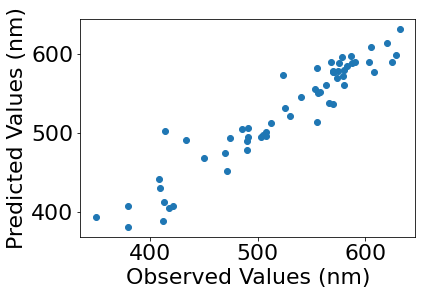

In [14]:
plt.figure()
plt.title("")
plt.plot(y_abs_test, y_abs_predict, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

# PL prediction

In [15]:
#split dataset into train and test set
X_train, X_test, y_PL_train, y_PL_test = train_test_split(X, y_PL, test_size=0.25, random_state=8, shuffle=True)

In [41]:
#optimising parameters

R2_dict = {}
    
for estimator in tqdm(np.arange (1, 1000, 1)):
    gbm = GradientBoostingRegressor(n_estimators=estimator)
    gbm.fit(X_train,y_PL_train)
    y_PL_predict = gbm.predict(X_test)
    MSE = mean_squared_error(y_PL_test, y_PL_predict)
    R2 = r2_score(y_PL_test, y_PL_predict)
    R2_dict[estimator] = R2
    
print("best estimator = ", max(R2_dict, key=R2_dict.get))

100%|██████████| 999/999 [03:42<00:00,  4.48it/s]

best estimator =  183


In [42]:
gbm = GradientBoostingRegressor(n_estimators=183)
gbm.fit(X_train,y_PL_train)
y_PL_predict = gbm.predict(X_test)
MSE = mean_squared_error(y_PL_test, y_PL_predict)
R2 = r2_score(y_PL_test, y_PL_predict)

print("MSE", MSE, "R2", R2)

MSE 480.3688505545961 R2 0.7254932752184045


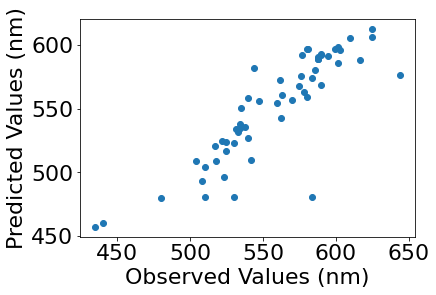

In [43]:
plt.figure()
plt.title("")
plt.plot(y_PL_test, y_PL_predict, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()